In [12]:
#Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dependencies
import pandas as pd
import numpy as np
from numpy import nan

import csv
import nltk
import pickle

In [4]:
#Pre-Processing + Custom Class Integration
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator


#Model Imports
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor

#Model Boosting
from sklearn.ensemble import BaggingRegressor

#Model Metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


#GridSearch
from sklearn.model_selection import GridSearchCV

#Scipy Integration for Sparse Matrixes
from scipy import sparse

#Additional Feature Engineering - NLP Text Data Import
from sklearn.feature_extraction.text import TfidfVectorizer

#PipeLine Imports
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


#Multi-threaded Processing
from sklearn.externals import joblib


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

/Users/harryfield/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
pd.set_option('display.max_columns', 500)

In [1]:
!pwd

/Users/harryfield/GA/Lessons/DSI9-lessons/projects/project-capstone


In [14]:
cleaned_df = pd.read_pickle('test.pkl')
cleaned_df.dropna(axis= 0, inplace = True)

In [15]:
X = cleaned_df
y = cleaned_df.pop('pct_sig_ch_high_low')

# Articles:
- https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1

In [16]:
#1. Importing Spacy Packages
import spacy
from spacy.lang.en import English
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA

In [17]:
#2. Importing Textblob Packages
from textblob import TextBlob

In [18]:
nlp = spacy.load("en_core_web_lg")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [19]:
text_1 = 'Paris is a nice city'
text_2 = 'London is a large city'

In [207]:
# text =  " Big thanks for posting this tune! It's nice to bring out some new music and hope all of you here can enjoy the new album, thank you :) "


In [219]:
nlp(text_1).similarity(nlp(text_2))

0.8950880863365216

In [220]:
nlp(text_1).similarity(nlp(text))

0.7374955765189001

In [ ]:
LDA - Latent Dirichlet Allocation

In [17]:
# np_array = doc.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA])
# np_array
# np_array.shape

In [22]:
def tokenize_and_parse(cell):
    my_doc = nlp(cell)
    text_blob = TextBlob(cell)
    token_list = []
    token_lemma = []
    pos_tagging =[]
    entity_list = {}
    
    for word in my_doc:
        if word.is_stop==False:
            token_list.append(word.text)
            token_lemma.append(word.lemma_)
            pos_tagging.append(word.pos_)
            
        else:
            pass
        
    # Entity Recognition
    for ent in my_doc.ents:
        entity_list[ent.text] = [ent.label_, ent.start_char, ent.end_char]
        
    sentiment_polarity = text_blob.sentiment[0]
    sentiment_subjectivity = text_blob.sentiment[1]
        
    return (token_list, token_lemma, pos_tagging, entity_list, sentiment_polarity, sentiment_subjectivity)

In [23]:
cleaned_df

,text_lower
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...
2016-01-03 23:19:00+00:00,"by the way, hillary &amp; the msm forgot to me..."
2016-01-04 00:26:00+00:00,"""@icareeguns: this #iowan is voting for @reald..."
2016-01-04 11:42:00+00:00,"""@rhettriley1234: trump only wins with our vot..."
2016-01-04 17:31:00+00:00,"i look forward to being in lowell, massachuset..."
2016-01-04 20:00:00+00:00,"woody johnson, owner of the nyjets, is @jebbus..."
2016-01-05 02:20:00+00:00,"the rally in lowell, massachusetts, was amazin..."
2016-01-05 02:22:00+00:00,"""@troyconway: now 2-more it firms going over s..."
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realdonaldtrump donald trum..."
2016-01-05 03:33:00+00:00,"""@samuelghaddad: wow! let's hear it for the fa..."


In [49]:
awesome = cleaned_df['text_lower'].apply(tokenize_and_parse)

In [54]:
len(awesome[0])

6

In [35]:
def descriptive_stats(dataframe):
    print('The first row of your dataframe contains the following:')
    print('Text',len(dataframe[0][0]),'Entries')
    print('Text Lemma',len(dataframe[0][1]),'Entries')
    print('POS Tagging',len(dataframe[0][2]),'Entries')
    print(len(dataframe[0][3]),'Matched Entities')
    print('The Sentiment Polarity Score Is:',round(dataframe[0][4], 3))
    print('The Sentiment Subjectivity Score Is:',round(dataframe[0][5], 3))

In [36]:
descriptive_stats(awesome)

The first row of your dataframe contains the following:
Text 8 Entries
Text Lemma 8 Entries
POS Tagging 8 Entries
0 Matched Entities
The Sentiment Polarity Score Is: -1.0
The Sentiment Subjectivity Score Is: 1.0


In [46]:
awesome[7][1]

['"',
 '@troyconway',
 ':',
 '2-more',
 'firm',
 'go',
 'sea',
 '?',
 'huge',
 'difference',
 'global',
 'economy',
 'greed',
 '!',
 '#',
 'makeamericagreatagain']

In [139]:
awesome[5][5]

0.5596704881447528

In [53]:
awesome.map(lambda x: x[5])

2016-01-03 23:18:00+00:00    1.000000
2016-01-03 23:19:00+00:00    0.000000
2016-01-04 00:26:00+00:00    0.500000
2016-01-04 11:42:00+00:00    0.600000
2016-01-04 17:31:00+00:00    0.165000
                               ...   
2019-08-09 12:03:00+00:00    0.583333
2019-08-09 12:03:00+00:00    0.500000
2019-08-09 18:44:00+00:00    0.825000
2019-08-09 18:44:00+00:00    0.616667
2019-08-12 04:01:00+00:00    0.000000
Name: text_lower, Length: 7571, dtype: float64

## An Example of Matched Entities

In [24]:
# refactor the matched entities dictionary

# {'Type' : [{'Word': ['Start Char', 'End Char']}] }

In [93]:
awesome.shape[0]

20

In [92]:
awesome[0][3]

{'Affiliate Marketing for Dummies': ['ORG', 26746, 26777],
 'first': ['ORDINAL', 26249, 26254],
 'January 14th': ['DATE', 792, 804],
 'two and a half months': ['DATE', 26255, 26276],
 'weeks': ['DATE', 863, 868],
 '1.30': ['MONEY', 12799, 12803],
 'Amazon': ['ORG', 18120, 18126],
 'February': ['DATE', 1150, 1158],
 'only a few weeks later': ['DATE', 1160, 1182],
 'Wikipedia': ['ORG', 1456, 1465],
 '24 hours': ['TIME', 3094, 3102],
 'a week': ['DATE', 2474, 2480],
 'a year or never': ['DATE', 2482, 2497],
 'Apple': ['ORG', 2936, 2941],
 '2,000': ['MONEY', 2988, 2993],
 'MacBook': ['ORG', 2994, 3001],
 'years': ['DATE', 5699, 5704],
 'tens of thousands': ['CARDINAL', 3627, 3644],
 'a month': ['DATE', 3645, 3652],
 'only four months': ['DATE', 3720, 3736],
 'over $1,200': ['MONEY', 3763, 3774],
 'Making Sense of Cents': ['WORK_OF_ART', 3888, 3909],
 'over $50,000': ['MONEY', 23871, 23883],
 'Affiliate Marketing': ['ORG', 26042, 26061],
 'Mike': ['PERSON', 4257, 4261],
 'over $95,000': ['M

In [54]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
import collections

In [55]:
dicts =  []

for i in range(awesome.shape[0]):
    temp_list = []
    
    for key, value in awesome[i][3].items():
        temp_list.append(value[0])
    dicts.append((dict(collections.Counter(temp_list))))


In [56]:
cleaned_df['Entities'] = dicts

In [87]:
cleaned_df

,text_lower,Entities
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...,{}
2016-01-03 23:19:00+00:00,"by the way, hillary &amp; the msm forgot to me...",{}
2016-01-04 00:26:00+00:00,"""@icareeguns: this #iowan is voting for @reald...","{'CARDINAL': 1, 'GPE': 1, 'PERSON': 1}"
2016-01-04 11:42:00+00:00,"""@rhettriley1234: trump only wins with our vot...",{}
2016-01-04 17:31:00+00:00,"i look forward to being in lowell, massachuset...","{'GPE': 1, 'DATE': 1}"
2016-01-04 20:00:00+00:00,"woody johnson, owner of the nyjets, is @jebbus...","{'PERSON': 1, 'ORG': 1}"
2016-01-05 02:20:00+00:00,"the rally in lowell, massachusetts, was amazin...","{'GPE': 1, 'CARDINAL': 1}"
2016-01-05 02:22:00+00:00,"""@troyconway: now 2-more it firms going over s...",{'CARDINAL': 1}
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realdonaldtrump donald trum...","{'CARDINAL': 1, 'TIME': 1}"
2016-01-05 03:33:00+00:00,"""@samuelghaddad: wow! let's hear it for the fa...",{'ORG': 1}


In [58]:
v = DictVectorizer(sparse=True)

In [59]:
X = v.fit_transform(cleaned_df['Entities'])

In [60]:
X.shape

(7571, 18)

In [61]:
test = pd.DataFrame(X.toarray(), columns = v.get_feature_names())

In [62]:
test

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
### The Sentiment Polarity Score
sentiment_polarity_score = awesome.map(lambda x: x[4])

In [64]:
sentiment_polarity_score

2016-01-03 23:18:00+00:00   -1.000000
2016-01-03 23:19:00+00:00    0.000000
2016-01-04 00:26:00+00:00    0.556250
2016-01-04 11:42:00+00:00    0.150000
2016-01-04 17:31:00+00:00    0.187500
                               ...   
2019-08-09 12:03:00+00:00    0.083333
2019-08-09 12:03:00+00:00   -0.250000
2019-08-09 18:44:00+00:00    0.475000
2019-08-09 18:44:00+00:00   -0.300000
2019-08-12 04:01:00+00:00    0.000000
Name: text_lower, Length: 7571, dtype: float64

In [65]:
### The Sentiment Subjectivity Score
subjectivity_score = awesome.map(lambda x: x[5])

In [66]:
subjectivity_score

2016-01-03 23:18:00+00:00    1.000000
2016-01-03 23:19:00+00:00    0.000000
2016-01-04 00:26:00+00:00    0.500000
2016-01-04 11:42:00+00:00    0.600000
2016-01-04 17:31:00+00:00    0.165000
                               ...   
2019-08-09 12:03:00+00:00    0.583333
2019-08-09 12:03:00+00:00    0.500000
2019-08-09 18:44:00+00:00    0.825000
2019-08-09 18:44:00+00:00    0.616667
2019-08-12 04:01:00+00:00    0.000000
Name: text_lower, Length: 7571, dtype: float64

In [110]:
len(v.get_feature_names())

18

In [111]:
v.get_feature_names()

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

----------------------------------------------------------------------------------------------------------------------------------

In [95]:
test

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,Punctuation,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'ADJ': 1, 'NOUN': 3, 'PROPN': 1, 'PUNCT': 2, ...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 5, 'PUNCT': 4, 'PROPN': 4, 'CCONJ': 1...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,2.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'PUNCT': 5, 'X': 2, 'SYM': 1, 'NOUN': 5, 'VER...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,3.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'PROPN': 2, 'VERB': 3, 'NOUN': 4}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'VERB': 3, 'ADV': 1, 'NOUN': 5, 'PUNCT': 5, '...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,3.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'ADJ': 2, 'NOUN': 6, 'PUNCT': 7, 'PROPN': 1, ...",2.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,2.0,0.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 3, 'PROPN': 2, 'PUNCT': 5, 'ADJ': 3, ...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 4, 'ADV': 1, 'NUM': 1, 'NOUN': 6, 'V...",2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"{'PUNCT': 4, 'NOUN': 5, 'VERB': 2, 'PROPN': 2}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'NOUN': 4, 'INTJ': 1, 'VERB': 6, ...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,6.0,0.0


In [70]:
# Counter For Different Types of Punctuation 
test['Punctuation'] = awesome.map(lambda x: dict(collections.Counter(x[2])))

ValueError: cannot reindex from a duplicate axis

In [75]:
test['Punctuation'] = awesome.map(lambda x: dict(collections.Counter(x[2]))).values

In [77]:
punct_vec = DictVectorizer(sparse=True)

In [78]:
test = pd.concat([test, pd.DataFrame(punct_vec.fit_transform(test['Punctuation']).toarray()
                              , columns = punct_vec.get_feature_names() )], axis = 1)

In [79]:
test

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,Punctuation,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'ADJ': 1, 'NOUN': 3, 'PROPN': 1, 'PUNCT': 2, ...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 5, 'PUNCT': 4, 'PROPN': 4, 'CCONJ': 1...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,2.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'PUNCT': 5, 'X': 2, 'SYM': 1, 'NOUN': 5, 'VER...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,3.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'PROPN': 2, 'VERB': 3, 'NOUN': 4}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'VERB': 3, 'ADV': 1, 'NOUN': 5, 'PUNCT': 5, '...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,3.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'ADJ': 2, 'NOUN': 6, 'PUNCT': 7, 'PROPN': 1, ...",2.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,2.0,0.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 3, 'PROPN': 2, 'PUNCT': 5, 'ADJ': 3, ...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 4, 'ADV': 1, 'NUM': 1, 'NOUN': 6, 'V...",2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"{'PUNCT': 4, 'NOUN': 5, 'VERB': 2, 'PROPN': 2}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'NOUN': 4, 'INTJ': 1, 'VERB': 6, ...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,6.0,0.0


In [80]:
sentiment_polarity_score

2016-01-03 23:18:00+00:00   -1.000000
2016-01-03 23:19:00+00:00    0.000000
2016-01-04 00:26:00+00:00    0.556250
2016-01-04 11:42:00+00:00    0.150000
2016-01-04 17:31:00+00:00    0.187500
                               ...   
2019-08-09 12:03:00+00:00    0.083333
2019-08-09 12:03:00+00:00   -0.250000
2019-08-09 18:44:00+00:00    0.475000
2019-08-09 18:44:00+00:00   -0.300000
2019-08-12 04:01:00+00:00    0.000000
Name: text_lower, Length: 7571, dtype: float64

In [81]:
sentiment = pd.DataFrame(list(zip(sentiment_polarity_score, subjectivity_score)), 
             columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity_Score']) 

In [83]:
# Adding on Sentiment Scores
final_df = pd.concat([test, sentiment], axis = 1 )

In [84]:
final_df

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,Punctuation,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'ADJ': 1, 'NOUN': 3, 'PROPN': 1, 'PUNCT': 2, ...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,-1.000000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 5, 'PUNCT': 4, 'PROPN': 4, 'CCONJ': 1...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,2.0,1.0,0.000000,0.000000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'PUNCT': 5, 'X': 2, 'SYM': 1, 'NOUN': 5, 'VER...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,3.0,2.0,0.556250,0.500000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'PROPN': 2, 'VERB': 3, 'NOUN': 4}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0,0.150000,0.600000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'VERB': 3, 'ADV': 1, 'NOUN': 5, 'PUNCT': 5, '...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'ADJ': 2, 'NOUN': 6, 'PUNCT': 7, 'PROPN': 1, ...",2.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,2.0,0.0,-0.375000,0.400000
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'NOUN': 3, 'PROPN': 2, 'PUNCT': 5, 'ADJ': 3, ...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 4, 'ADV': 1, 'NUM': 1, 'NOUN': 6, 'V...",2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"{'PUNCT': 4, 'NOUN': 5, 'VERB': 2, 'PROPN': 2}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.000000,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'PUNCT': 6, 'NOUN': 4, 'INTJ': 1, 'VERB': 6, ...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,6.0,0.0,0.291667,0.600000


In [85]:
final_df.drop(columns = ['Punctuation'], inplace = True)

In [92]:
cleaned_df.head(1)

,text_lower,Entities
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...,{}


In [106]:
final_df.index = cleaned_df.index
final_df['text'] = cleaned_df.text_lower
final_df['pct_ch'] = y

In [107]:
money_df = final_df[(final_df.MONEY==1)|(final_df.MONEY==2)]

In [110]:
money_df.pct_ch.value_counts(normalize=True)

 0    0.928571
-1    0.049689
 1    0.021739
Name: pct_ch, dtype: float64

In [117]:
gpe_df = final_df[final_df.GPE!=0]

In [119]:
gpe_df.pct_ch.value_counts(normalize=True)

 0    0.925648
-1    0.051842
 1    0.022510
Name: pct_ch, dtype: float64

In [244]:
final_df.GPE.value_counts()

0.0    6105
1.0    1224
2.0     214
3.0      21
4.0       7
Name: GPE, dtype: int64

In [245]:
final_df[final_df.pct_ch.abs()==1].GPE.value_counts()

0.0    417
1.0     92
2.0     16
3.0      1
Name: GPE, dtype: int64

In [234]:
final_df.PRON.value_counts()

0.0    7496
1.0      74
2.0       1
Name: PRON, dtype: int64

In [138]:
final_df

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,text,pct_ch
2016-01-03 23:18:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,-1.000000,1.000000,the worst thing hillary could do is have her h...,0
2016-01-03 23:19:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,1.0,0.0,2.0,1.0,0.000000,0.000000,"by the way, hillary &amp; the msm forgot to me...",0
2016-01-04 00:26:00+00:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,3.0,2.0,0.556250,0.500000,"""@icareeguns: this #iowan is voting for @reald...",0
2016-01-04 11:42:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,3.0,0.0,0.150000,0.600000,"""@rhettriley1234: trump only wins with our vot...",0
2016-01-04 17:31:00+00:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,3.0,0.0,0.187500,0.165000,"i look forward to being in lowell, massachuset...",0
2016-01-04 20:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,2.0,0.0,-0.375000,0.400000,"woody johnson, owner of the nyjets, is @jebbus...",0
2016-01-05 02:20:00+00:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.566667,0.683333,"the rally in lowell, massachusetts, was amazin...",0
2016-01-05 02:22:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.200000,0.450000,"""@troyconway: now 2-more it firms going over s...",0
2016-01-05 02:28:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.000000,0.000000,"""@thecybermenace: @realdonaldtrump donald trum...",0
2016-01-05 03:33:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,6.0,0.0,0.291667,0.600000,"""@samuelghaddad: wow! let's hear it for the fa...",0


In [131]:
final_df[final_df.pct_ch!=0].describe() / 

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,pct_ch
count,526.000000,526.000000,526.0,526.000000,526.000000,526.0,526.0,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,0.211027,0.205323,0.0,0.003802,0.241445,0.0,0.0,0.009506,0.045627,0.089354,0.020913,0.134981,0.032319,0.167300,0.001901,0.003802,0.087452,0.001901,1.408745,0.055133,0.317490,0.009506,0.051331,0.009506,0.138783,4.558935,0.222433,0.036122,0.009506,0.897338,2.979087,0.155894,0.115970,1.910646,0.690114,0.127976,0.417638,-0.315589
std,0.461005,0.465628,0.0,0.061604,0.505845,0.0,0.0,0.097125,0.217803,0.317131,0.143228,0.358346,0.309994,0.416968,0.043602,0.061604,0.314649,0.043602,1.149012,0.228457,0.575664,0.097125,0.245392,0.115077,0.392474,2.073724,0.630911,0.206161,0.097125,1.027671,1.615856,0.511239,0.390179,1.251894,0.756544,0.346593,0.315340,0.949799
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.454545,-1.000000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,3.000000,1.000000,0.280952,0.666667,1.000000
max,3.000000,3.000000,0.0,1.000000,3.000000,0.0,0.0,1.000000,2.000000,3.000000,1.000000,2.000000,6.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,12.000000,6.000000,2.000000,1.000000,6.000000,9.000000,7.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000


In [133]:
final_df[final_df.pct_ch!=0].describe() / final_df.describe()

,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SPACE,SYM,VERB,X,Sentiment_Polarity,Sentiment_Subjectivity_Score,pct_ch
count,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476,0.069476
mean,1.009275,1.014026,0.000000,1.028110,1.048754,0.000000,0.000000,2.321538,1.019011,0.761820,0.874745,1.052462,1.366984,0.963218,0.575741,0.928615,1.057672,0.575741,0.946876,0.950826,0.964575,1.531227,0.548906,1.179798,1.213312,0.987319,1.023113,1.116233,0.946943,1.024544,0.954412,0.928615,0.973399,1.044742,1.072205,0.882681,0.978536,14.393536
std,0.998390,1.010728,0.000000,1.014803,0.989151,0.000000,0.000000,1.520861,1.001794,0.889680,0.917010,0.975049,1.576303,0.990096,0.759982,0.964642,1.011691,0.759982,0.909515,0.954631,0.981183,1.210816,0.767532,1.266392,1.089167,0.925392,1.077751,1.132023,0.961538,0.966007,0.901628,0.959379,1.006094,0.980041,1.023443,0.950599,1.001153,3.615719
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,-inf
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.956938,-inf
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,0.775041,0.995025,inf
max,0.750000,0.600000,0.000000,1.000000,0.750000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,1.000000,0.600000,0.500000,0.750000,0.500000,0.666667,1.000000,1.000000,0.857143,0.750000,1.000000,0.500000,0.600000,0.529412,0.777778,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000


In [ ]:
# NORP, ORG, PERCENT, PERSON, CCONJ, INTJ, PUNCT, LOC, PRODUCT, WORK_OF_ART, AUX, Sentiment_polarity #

In [139]:
df_merge = final_df[['text', 'pct_ch', 'NORP', 'ORG', 'PERCENT', 'PERSON', 'CCONJ', 'INTJ', 'PUNCT', 'LOC', 'PRODUCT',\
          'WORK_OF_ART', 'AUX', 'Sentiment_Polarity']]

In [141]:
binary_words = pd.read_csv('binary_words.csv')

In [146]:
binary_words.index = df_merge.index

In [148]:
binary_words.drop(columns='Unnamed: 0', inplace=True)

In [190]:
binary_words.reset_index(inplace=True)

In [191]:
df_merge.reset_index(inplace=True)

In [187]:
df_merge.loc['2016-01-04 17:31:00+00:00'].text

'i look forward to being in lowell, massachusetts, today. i hear a very big crowd is expected--we will have lots of fun!'

In [175]:
df_merge

,text,pct_ch,NORP,ORG,PERCENT,PERSON,CCONJ,INTJ,PUNCT,LOC,PRODUCT,WORK_OF_ART,AUX,Sentiment_Polarity
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.000000
2016-01-03 23:19:00+00:00,"by the way, hillary &amp; the msm forgot to me...",0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000
2016-01-04 00:26:00+00:00,"""@icareeguns: this #iowan is voting for @reald...",0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.556250
2016-01-04 11:42:00+00:00,"""@rhettriley1234: trump only wins with our vot...",0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.150000
2016-01-04 17:31:00+00:00,"i look forward to being in lowell, massachuset...",0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.187500
2016-01-04 20:00:00+00:00,"woody johnson, owner of the nyjets, is @jebbus...",0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,-0.375000
2016-01-05 02:20:00+00:00,"the rally in lowell, massachusetts, was amazin...",0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.566667
2016-01-05 02:22:00+00:00,"""@troyconway: now 2-more it firms going over s...",0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.200000
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realdonaldtrump donald trum...",0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.000000
2016-01-05 03:33:00+00:00,"""@samuelghaddad: wow! let's hear it for the fa...",0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.291667


In [172]:
final_merge.loc['2019-08-08 23:12:00+00:00', :].shape

(4, 43)

In [162]:
binary_words.index

DatetimeIndex(['2016-01-03 23:18:00+00:00', '2016-01-03 23:19:00+00:00',
               '2016-01-04 00:26:00+00:00', '2016-01-04 11:42:00+00:00',
               '2016-01-04 17:31:00+00:00', '2016-01-04 20:00:00+00:00',
               '2016-01-05 02:20:00+00:00', '2016-01-05 02:22:00+00:00',
               '2016-01-05 02:28:00+00:00', '2016-01-05 03:33:00+00:00',
               ...
               '2019-08-08 22:19:00+00:00', '2019-08-08 22:19:00+00:00',
               '2019-08-08 23:12:00+00:00', '2019-08-08 23:12:00+00:00',
               '2019-08-08 23:55:00+00:00', '2019-08-09 12:03:00+00:00',
               '2019-08-09 12:03:00+00:00', '2019-08-09 18:44:00+00:00',
               '2019-08-09 18:44:00+00:00', '2019-08-12 04:01:00+00:00'],
              dtype='datetime64[ns, UTC]', length=7571, freq=None)

In [192]:
final_merge = pd.merge(df_merge, binary_words, left_index=True, right_index=True, how='left')

In [173]:
final_merge.drop_duplicates(inplace=True)

In [195]:
final_merge.index = final_merge.index_x

In [198]:
final_merge.drop(columns='index_x', inplace=True)

In [199]:
final_merge.to_csv('final_merge.csv')

In [124]:
def correlation_heat_map(df):
    corrs = df.corr()
    corrs = df.corr()[(df.corr() < 1.0) & (df.corr() > 0.1) | (df.corr() < -0.1)].dropna(how='all')
    fig, ax = plt.subplots(figsize=(20, 9))
    ax = sns.heatmap(corrs, annot=True, cmap='coolwarm')

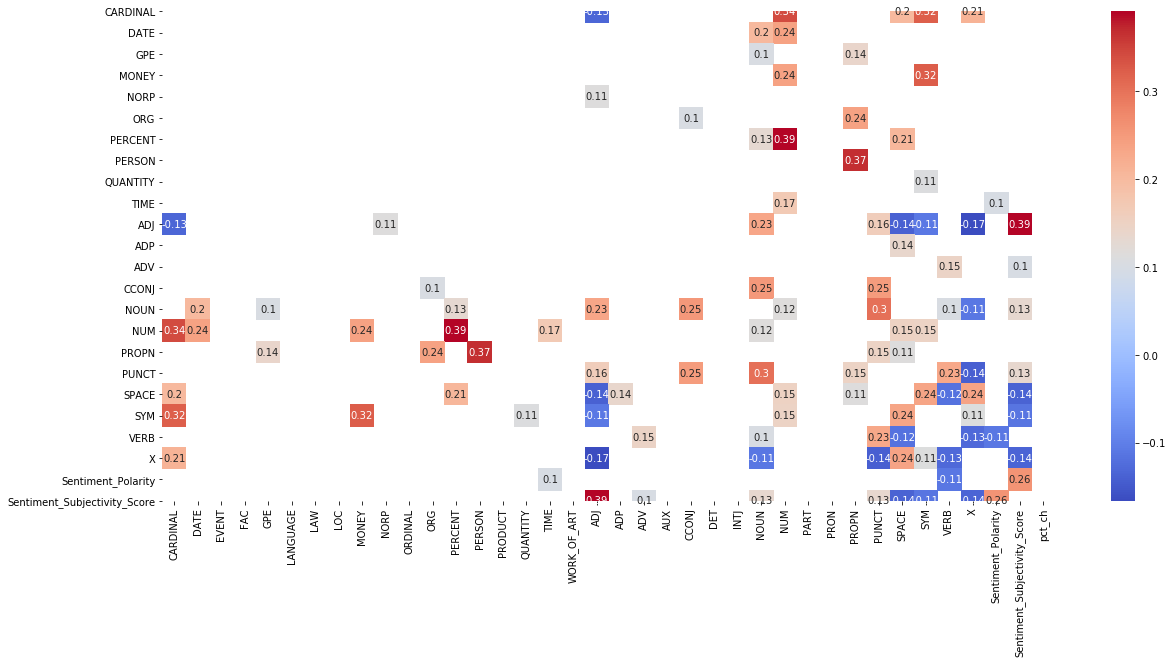

In [127]:
correlation_heat_map(final_df)

----------------------------------------------------------------------------------------------------------------------------------

## # Modelling 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state= 3)

In [82]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [43]:
vectorizer = TfidfVectorizer(stop_words = 'english'
                            ,min_df=3, 
                             ngram_range=(1, 4),
                             max_features = 15,
                            )

In [44]:
fitted_vectorizer = vectorizer.fit(X_train['Article_Text'])

In [83]:
X_train_titles = fitted_vectorizer.transform(X_train['Article_Text'])

In [84]:
X_test_titles = fitted_vectorizer.transform(X_test['Article_Text'])

In [85]:
X_train.drop(axis=1, columns = ['Article_Text'], inplace= True)
X_test.drop(axis=1, columns = ['Article_Text'], inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [86]:
X_train_titles

<12594x15 sparse matrix of type '<class 'numpy.float64'>'
	with 76005 stored elements in Compressed Sparse Row format>

In [87]:
test_one = pd.DataFrame(X_train_titles.toarray(), columns = fitted_vectorizer.get_feature_names())
test_two = pd.DataFrame(X_test_titles.toarray(), columns =  fitted_vectorizer.get_feature_names())

In [88]:
X_train = pd.concat([X_train, test_one], axis=1)
X_test = pd.concat([X_test, test_two], axis=1)

In [90]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)